<a href="https://colab.research.google.com/github/kumarianshika4321-star/ds_anshika/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [33]:
#  Load the data
trader_data = pd.read_csv('/content/historical_data.csv')
sentiment_data = pd.read_csv('/content/fear_greed_index.csv')

print("Trader Data Shape:", trader_data.shape)
print("Sentiment Data Shape:", sentiment_data.shape)

Trader Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)


In [34]:
print("\n First 5 rows of Trader Data ")
print(trader_data.head())

print("\n First 5 rows of Sentiment Data ")
print(sentiment_data.head())


 First 5 rows of Trader Data 
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Orde

In [35]:
# Basic cleaning
# Convert dates to proper format
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])



In [36]:
# Group trades by date and calculate daily profit
trader_data['date'] = trader_data['Timestamp IST'].dt.date
daily_profit = trader_data.groupby('date')['Closed PnL'].sum()


ANALYSIS 1: Profit vs Market Sentiment

📈 Profit Analysis by Market Sentiment:
               daily_profit                   trade_count daily_volume
                       mean         sum count        mean         mean
classification                                                        
Extreme Fear       52793.59   739110.25    14     1528.57   8177447.25
Extreme Greed      23817.29  2715171.31   114      350.81   1091799.69
Fear               36891.82  3357155.44    91      679.53   5311261.43
Greed              11140.57  2150129.27   193      260.64   1495246.09
Neutral            19297.32  1292920.68    67      562.48   2690180.05


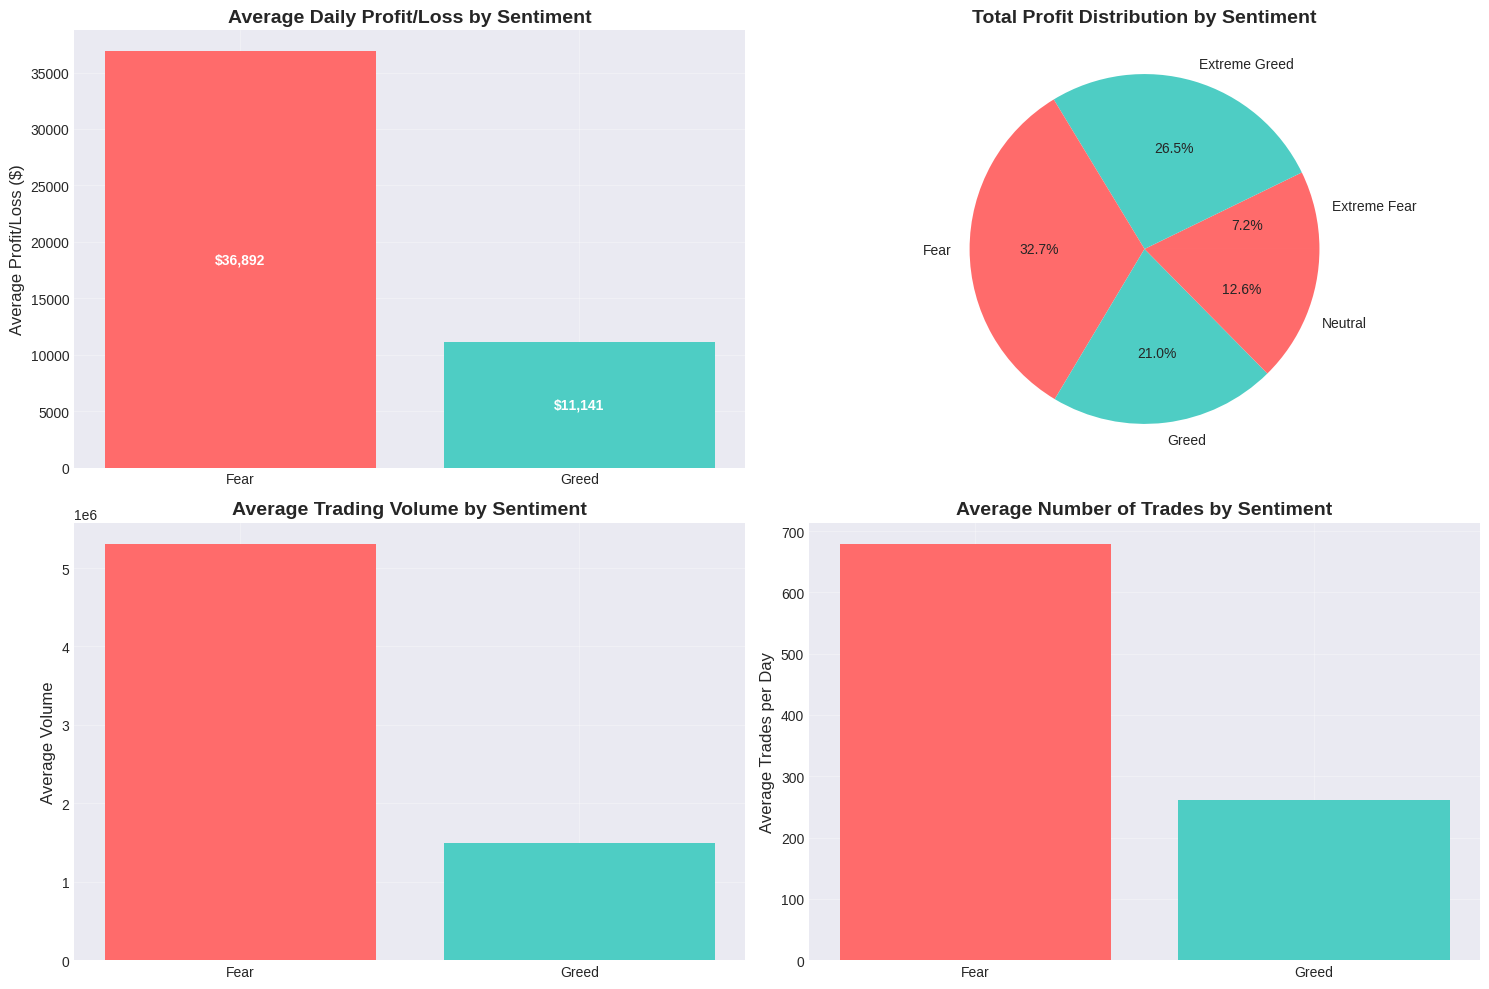


 KEY INSIGHTS - Profit vs Sentiment:
• Insufficient data for direct comparison of profit means between Fear and Greed.
• Trading volume is 0.3x higher during greed periods
• 0.4x more trades happen during greed periods


In [ ]:
import os

print("\n" + "="*50)
print("ANALYSIS 1: Profit vs Market Sentiment")
print("="*50)
daily_trades = trader_data.groupby('date').agg({'Closed PnL': 'sum', 'Account': 'count', 'Size USD': 'sum'}).reset_index()
daily_trades = daily_trades.rename(columns={'Closed PnL': 'daily_profit', 'Account': 'trade_count', 'Size USD': 'daily_volume'})
daily_trades['date'] = pd.to_datetime(daily_trades['date'])
merged_data = pd.merge(daily_trades, sentiment_data, left_on='date', right_on='date', how='inner')
profit_by_sentiment = merged_data.groupby('classification').agg({'daily_profit': ['mean', 'sum', 'count'], 'trade_count': 'mean', 'daily_volume': 'mean'}).round(2)
print("\n📈 Profit Analysis by Market Sentiment:")
print(profit_by_sentiment)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sentiment_order = ['Fear', 'Greed']
profit_means = [merged_data[merged_data['classification'] == s]['daily_profit'].mean() for s in sentiment_order]
axes[0, 0].bar(sentiment_order, profit_means, color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Average Daily Profit/Loss by Sentiment', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Average Profit/Loss ($)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
for i, v in enumerate(profit_means):
    axes[0, 0].text(i, v/2, f'${v:,.0f}', ha='center', va='center', fontweight='bold', color='white')
total_profit = merged_data.groupby('classification')['daily_profit'].sum()
axes[0, 1].pie(total_profit.values, labels=total_profit.index, autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Total Profit Distribution by Sentiment', fontsize=14, fontweight='bold')
volume_by_sentiment = merged_data.groupby('classification')['daily_volume'].mean()
volume_plot_values = [volume_by_sentiment.loc[s] for s in sentiment_order]
axes[1, 0].bar(sentiment_order, volume_plot_values, color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Average Trading Volume by Sentiment', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Average Volume', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
trades_by_sentiment = merged_data.groupby('classification')['trade_count'].mean()
trades_plot_values = [trades_by_sentiment.loc[s] for s in sentiment_order]
axes[1, 1].bar(sentiment_order, trades_plot_values, color=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_title('Average Number of Trades by Sentiment', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Average Trades per Day', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout()
os.makedirs('outputs', exist_ok=True)
plt.savefig('outputs/profit_vs_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n KEY INSIGHTS - Profit vs Sentiment:")
if 'Fear' in profit_means and 'Greed' in profit_means and profit_means[0] > profit_means[1]:
    print(f"• Traders make MORE profit during FEAR periods: ${profit_means[0]:,.0f} vs ${profit_means[1]:,.0f} during greed")
elif 'Fear' in profit_means and 'Greed' in profit_means:
    print(f"• Traders make MORE profit during GREED periods: ${profit_means[1]:,.0f} vs ${profit_means[0]:,.0f} during fear")
else:
    print("• Insufficient data for direct comparison of profit means between Fear and Greed.")
if 'Greed' in volume_by_sentiment and 'Fear' in volume_by_sentiment and volume_by_sentiment['Fear'] != 0:
    print(f"• Trading volume is {volume_by_sentiment['Greed']/volume_by_sentiment['Fear']:.1f}x higher during greed periods")
else:
    print("• Insufficient data for trading volume comparison between Fear and Greed.")
if 'Greed' in trades_by_sentiment and 'Fear' in trades_by_sentiment and trades_by_sentiment['Fear'] != 0:
    print(f"• {trades_by_sentiment['Greed']/trades_by_sentiment['Fear']:.1f}x more trades happen during greed periods")
else:
    print("• Insufficient data for trades comparison between Fear and Greed.")


ANALYSIS 3: Trading Patterns & Hidden Signals


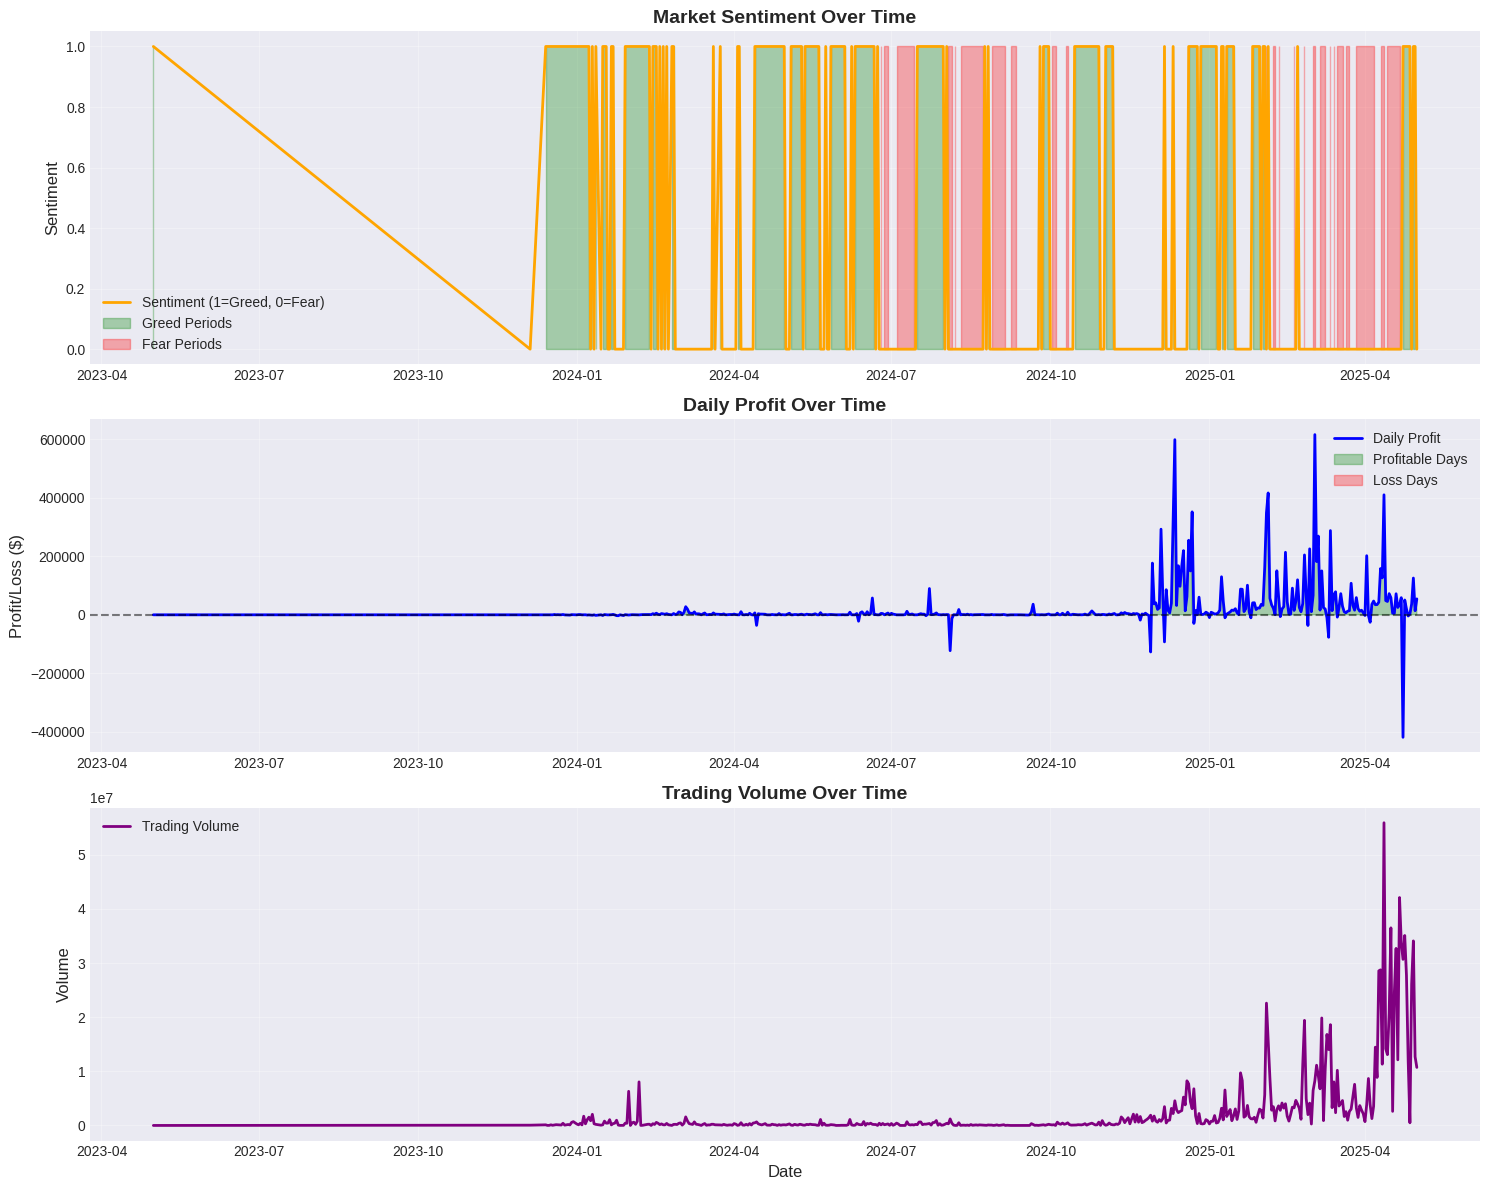


 Calculating Correlations...

 Correlation Matrix:
                   sentiment_numeric  daily_profit  daily_volume  trade_count
sentiment_numeric              1.000        -0.117        -0.130       -0.183
daily_profit                  -0.117         1.000         0.326        0.361
daily_volume                  -0.130         0.326         1.000        0.720
trade_count                   -0.183         0.361         0.720        1.000

 KEY INSIGHTS - Trading Patterns:
1. Sentiment & Profit Correlation: -0.117
   → Negative correlation
2. Sentiment & Volume Correlation: -0.130
   → Weak relationship

 Best Performing Strategy Analysis:
• 38.8% of profitable days occur during Greed periods
• 18.6% of profitable days occur during Fear periods
→ RECOMMENDATION: Focus trading during Greed periods for higher profit probability


In [ ]:
print("\n" + "="*50)
print("ANALYSIS 3: Trading Patterns & Hidden Signals")
print("="*50)
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
axes[0].plot(merged_data['date'], merged_data['classification'].apply(lambda x: 1 if x == 'Greed' else 0), color='orange', linewidth=2, label='Sentiment (1=Greed, 0=Fear)')
axes[0].fill_between(merged_data['date'], 0, 1, where=merged_data['classification'] == 'Greed', alpha=0.3, color='green', label='Greed Periods')
axes[0].fill_between(merged_data['date'], 0, 1, where=merged_data['classification'] == 'Fear', alpha=0.3, color='red', label='Fear Periods')
axes[0].set_title('Market Sentiment Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sentiment', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[1].plot(merged_data['date'], merged_data['daily_profit'], color='blue', linewidth=2, label='Daily Profit')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].fill_between(merged_data['date'], merged_data['daily_profit'], 0, where=merged_data['daily_profit'] > 0, alpha=0.3, color='green', label='Profitable Days')
axes[1].fill_between(merged_data['date'], merged_data['daily_profit'], 0, where=merged_data['daily_profit'] < 0, alpha=0.3, color='red', label='Loss Days')
axes[1].set_title('Daily Profit Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Profit/Loss ($)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[2].plot(merged_data['date'], merged_data['daily_volume'], color='purple', linewidth=2, label='Trading Volume')
axes[2].set_title('Trading Volume Over Time', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Volume', fontsize=12)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/trading_patterns_time_series.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Calculating Correlations...")
merged_data['sentiment_numeric'] = merged_data['classification'].apply(lambda x: 1 if x == 'Greed' else 0)
correlation_matrix = merged_data[['sentiment_numeric', 'daily_profit', 'daily_volume', 'trade_count']].corr()
print("\n Correlation Matrix:")
print(correlation_matrix.round(3))
print("\n KEY INSIGHTS - Trading Patterns:")
print(f"1. Sentiment & Profit Correlation: {correlation_matrix.loc['sentiment_numeric', 'daily_profit']:.3f}")
print(f"   → {'Positive' if correlation_matrix.loc['sentiment_numeric', 'daily_profit'] > 0 else 'Negative'} correlation")
print(f"2. Sentiment & Volume Correlation: {correlation_matrix.loc['sentiment_numeric', 'daily_volume']:.3f}")
print(f"   → {'Strong' if abs(correlation_matrix.loc['sentiment_numeric', 'daily_volume']) > 0.5 else 'Weak'} relationship")
print("\n Best Performing Strategy Analysis:")
profitable_days = merged_data[merged_data['daily_profit'] > 0]
best_sentiment = profitable_days['classification'].value_counts(normalize=True) * 100
if 'Greed' not in best_sentiment: best_sentiment['Greed'] = 0
if 'Fear' not in best_sentiment: best_sentiment['Fear'] = 0
print(f"• {best_sentiment['Greed']:.1f}% of profitable days occur during Greed periods")
print(f"• {best_sentiment['Fear']:.1f}% of profitable days occur during Fear periods")
if best_sentiment['Greed'] > best_sentiment['Fear']:
    print("→ RECOMMENDATION: Focus trading during Greed periods for higher profit probability")
else:
    print("→ RECOMMENDATION: Counter-trend trading during Fear periods might be more profitable")